In [90]:
import pickle
from glob import glob
import numpy as np

## From search (easy, medium, hard)

In [91]:
# ----------------------------------------------------------------------------------------------------------
# In this cell, we load all matching .pkl data files for 1-push tasks, extract episodes where a solution 
# was found, and compute the per-region success rates (solutions/pushes). We aggregate these results for 
# later analysis, making sure to not double-count regions within an episode.
# ----------------------------------------------------------------------------------------------------------

# Initialize counter for number of files processed
search_push_data = []
search_total_pushes = []

search_per_env_per_neighbor = {}
search_region_opening_attempts = 0
search_success_region_opening_attempts = 0

# Path to the data files (pkl files containing pickled episode results)
data_dir = "/common/users/dm1487/namo_data/nov24/1_push/all_solutions/**/*.pkl"

xml_file_set = set()
# Iterate through all .pkl files that match the data_dir pattern
# BUG: glob() here refers to the glob function from the glob module, but glob.glob() 
# does not expand ** (recursive glob) unless you pass recursive=True.
for file in glob(data_dir, recursive=True):
    try:
        # Attempt to open and load each pickle file
        with open(file, "rb") as f:
            data = pickle.load(f)
            episode_results = data['episode_results']
            # Track which regions have been processed, so we don't double-count them
            region_done = set()
            if len(episode_results) > 0:
                # Loop through each episode in the file
                for ep_idx in range(len(episode_results)):
                    
                    xml_file_name = "_".join(episode_results[ep_idx]['xml_file'].split('/')[-4:])
                    if "easy" in xml_file_name:
                        continue
                    if xml_file_name not in xml_file_set:
                        xml_file_set.add(xml_file_name)
                        search_per_env_per_neighbor[xml_file_name] = {}
                    
                    # Check if a solution was found in this episode
                    if episode_results[ep_idx]['solution_found']:
                        # Only add data for a region if we haven't seen it for this file
                        region_label = episode_results[ep_idx]['algorithm_stats']['neighbour_region_label']
                        
                        if region_label not in region_done:
                            search_per_env_per_neighbor[xml_file_name][region_label] = {}
                            # Make sure we don't divide by zero
                            if episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour'] > 0:
                                search_per_env_per_neighbor[xml_file_name][region_label]['success'] = 1
                                search_per_env_per_neighbor[xml_file_name][region_label]['ratio'] = episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] / episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                
                                search_region_opening_attempts += 1
                                region_done.add(region_label)
                                search_success_region_opening_attempts += 1
                                # Append a tuple of the episode result and the success ratio to all_push_data
                                search_push_data.append((
                                    episode_results[ep_idx],
                                    episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] /
                                    episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                ))
                                search_total_pushes.append(episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour'])
                            else:
                                # print(f"No pushes total for neighbour in episode {ep_idx}", file)
                                search_region_opening_attempts += 1
                                search_per_env_per_neighbor[xml_file_name][region_label]['success'] = 0
                                search_per_env_per_neighbor[xml_file_name][region_label]['ratio'] = 0
                    else:
                        search_region_opening_attempts += 1
    except Exception as e:
        # Print the error if something goes wrong, then continue to the next file
        print("Error in search data collection:")
        print(e)
        continue


Error in search data collection:
No module named 'namo_rl'
Error in search data collection:
No module named 'namo_rl'


In [92]:
easy_threshold = 0.75
hard_threshold = 0.25

easy = []
medium = []
hard = []
for ep_res, p in search_push_data:
    if p > easy_threshold:
        easy.append(ep_res)
    elif p > hard_threshold and p <= easy_threshold:
        medium.append(ep_res)
    else:
        hard.append(ep_res)
len(easy), len(medium), len(hard), search_success_region_opening_attempts, search_region_opening_attempts, search_success_region_opening_attempts / search_region_opening_attempts

(832, 2560, 5426, 8818, 9629, 0.9157752622286842)

In [93]:
832/8818, 2560/8818, 5426/8818

(0.09435246087548196, 0.29031526423225223, 0.6153322748922658)

Median total pushes: 46.0
Mean total pushes: 58.300408255840324


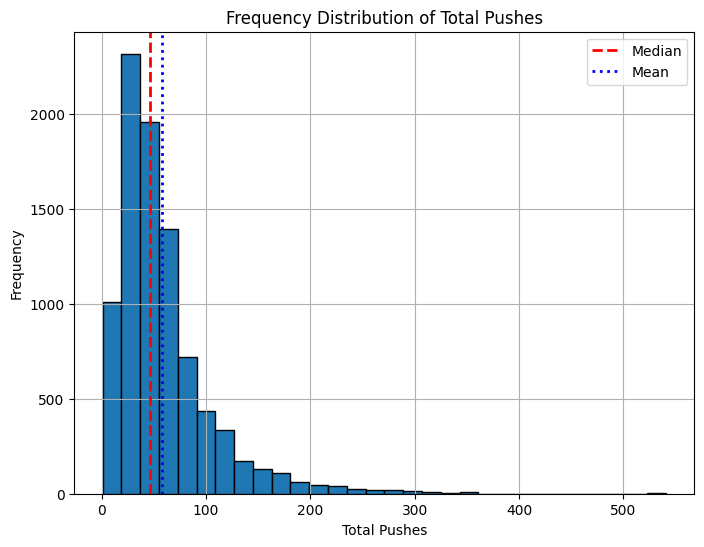

In [94]:
import matplotlib.pyplot as plt

import numpy as np 

median_pushes = np.median(np.array(search_total_pushes))
mean_pushes = np.mean(np.array(search_total_pushes))

print("Median total pushes:", median_pushes)
print("Mean total pushes:", mean_pushes)

plt.figure(figsize=(8, 6))
plt.hist(search_total_pushes, bins=30, edgecolor='black')
plt.axvline(median_pushes, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_pushes, color='blue', linestyle='dotted', linewidth=2, label='Mean')
plt.xlabel('Total Pushes')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Total Pushes')
plt.legend()
plt.grid(True)
plt.show()

## No heuristic

In [77]:
# ----------------------------------------------------------------------------------------------------------
# In this cell, we load all matching .pkl data files for 1-push tasks, extract episodes where a solution 
# was found, and compute the per-region success rates (solutions/pushes). We aggregate these results for 
# later analysis, making sure to not double-count regions within an episode.
# ----------------------------------------------------------------------------------------------------------

# Initialize counter for number of files processed
no_heuristic_push_data = []
no_heuristic_total_pushes = []

no_heuristic_per_env_per_neighbor = {}
no_heuristic_region_opening_attempts = 0
no_heuristic_success_region_opening_attempts = 0

# Path to the data files (pkl files containing pickled episode results)
data_dir = "/common/users/dm1487/namo_data/nov24/1_push/first_solution/**/*.pkl"

xml_file_set = set()
# Iterate through all .pkl files that match the data_dir pattern
# BUG: glob() here refers to the glob function from the glob module, but glob.glob() 
# does not expand ** (recursive glob) unless you pass recursive=True.
for file in glob(data_dir, recursive=True):
    try:
        # Attempt to open and load each pickle file
        with open(file, "rb") as f:
            data = pickle.load(f)
            episode_results = data['episode_results']
            # Track which regions have been processed, so we don't double-count them
            region_done = set()
            if len(episode_results) > 0:
                # Loop through each episode in the file
                for ep_idx in range(len(episode_results)):
                    
                    xml_file_name = "_".join(episode_results[ep_idx]['xml_file'].split('/')[-4:])
                    if "easy" in xml_file_name:
                        continue
                    if xml_file_name not in xml_file_set:
                        xml_file_set.add(xml_file_name)
                        no_heuristic_per_env_per_neighbor[xml_file_name] = {}
                    
                    # Check if a solution was found in this episode
                    if episode_results[ep_idx]['solution_found']:
                        # Only add data for a region if we haven't seen it for this file
                        region_label = episode_results[ep_idx]['algorithm_stats']['neighbour_region_label']
                        
                        if region_label not in region_done:
                            no_heuristic_per_env_per_neighbor[xml_file_name][region_label] = {}
                            # Make sure we don't divide by zero
                            if episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour'] > 0:
                                no_heuristic_per_env_per_neighbor[xml_file_name][region_label]['success'] = 1
                                no_heuristic_per_env_per_neighbor[xml_file_name][region_label]['ratio'] = episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] / episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                no_heuristic_per_env_per_neighbor[xml_file_name][region_label]['pushes'] = episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                no_heuristic_region_opening_attempts += 1
                                region_done.add(region_label)
                                no_heuristic_success_region_opening_attempts += 1
                                # Append a tuple of the episode result and the success ratio to all_push_data
                                no_heuristic_push_data.append((
                                    episode_results[ep_idx],
                                    episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] /
                                    episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                ))
                                no_heuristic_total_pushes.append(episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour'])
                            else:
                                # print(f"No pushes total for neighbour in episode {ep_idx}", file)
                                no_heuristic_region_opening_attempts += 1
                                no_heuristic_per_env_per_neighbor[xml_file_name][region_label]['success'] = 0
                                no_heuristic_per_env_per_neighbor[xml_file_name][region_label]['ratio'] = 0
                    else:
                        no_heuristic_region_opening_attempts += 1
    except Exception as e:
        # Print the error if something goes wrong, then continue to the next file
        print("Error in search data collection:")
        print(e)
        continue


Error in search data collection:
No module named 'namo_rl'
Error in search data collection:
No module named 'namo_rl'


In [78]:
easy_threshold = 0.75
hard_threshold = 0.25

easy = []
medium = []
hard = []
for ep_res, p in no_heuristic_push_data:
    if p > easy_threshold:
        easy.append(ep_res)
    elif p > hard_threshold and p <= easy_threshold:
        medium.append(ep_res)
    else:
        hard.append(ep_res)
len(easy), len(medium), len(hard), no_heuristic_success_region_opening_attempts, no_heuristic_region_opening_attempts, no_heuristic_success_region_opening_attempts / no_heuristic_region_opening_attempts

(2887, 554, 5388, 8829, 9625, 0.9172987012987013)

In [79]:
len(easy)/no_heuristic_success_region_opening_attempts, len(medium)/no_heuristic_success_region_opening_attempts, len(hard)/no_heuristic_success_region_opening_attempts

(0.32699059916185297, 0.06274776305357345, 0.6102616377845735)

Median total pushes: 8.0
Mean total pushes: 17.437422131611733


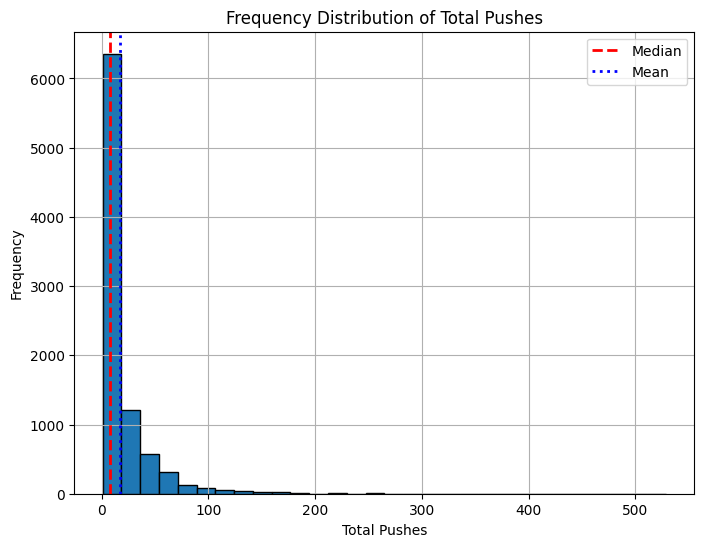

In [80]:
import matplotlib.pyplot as plt

import numpy as np 

median_pushes = np.median(np.array(no_heuristic_total_pushes))
mean_pushes = np.mean(np.array(no_heuristic_total_pushes))

print("Median total pushes:", median_pushes)
print("Mean total pushes:", mean_pushes)

plt.figure(figsize=(8, 6))
plt.hist(no_heuristic_total_pushes, bins=30, edgecolor='black')
plt.axvline(median_pushes, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_pushes, color='blue', linestyle='dotted', linewidth=2, label='Mean')
plt.xlabel('Total Pushes')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Total Pushes')
plt.legend()
plt.grid(True)
plt.show()

## Learned Heuristic

In [87]:
# ----------------------------------------------------------------------------------------------------------
# In this cell, we load all matching .pkl data files for 1-push tasks, extract episodes where a solution 
# was found, and compute the per-region success rates (solutions/pushes). We aggregate these results for 
# later analysis, making sure to not double-count regions within an episode.
# ----------------------------------------------------------------------------------------------------------

# Initialize counter for number of files processed

learned_push_data = []
learned_total_pushes = []

learned_per_env_per_neighbor = {}
learned_region_opening_attempts = 0
learned_success_region_opening_attempts = 0

# Path to the data files (pkl files containing pickled episode results)
# data_dir = "/common/users/dm1487/namo_data/outputs/diffusion_only_goal/nov20_1push_diffusion_only_goal/2025-11-20_09-41-46/results_new/**/*.pkl"
# data_dir = "/common/home/dm1487/robotics_research/ktamp/sage_learning/outputs/2025-11-26/15-04-18/results/**/*.pkl"
data_dir = "/common/users/dm1487/namo_data/outputs/flow_matching/2025-11-26/14-50-24/results/**/*.pkl"


xml_file_set = set()
# Iterate through all .pkl files that match the data_dir pattern
# BUG: glob() here refers to the glob function from the glob module, but glob.glob() 
# does not expand ** (recursive glob) unless you pass recursive=True.
for file in glob(data_dir, recursive=True):
    try:
        # Attempt to open and load each pickle file
        with open(file, "rb") as f:
            data = pickle.load(f)
            episode_results = data['episode_results']
            # Track which regions have been processed, so we don't double-count them
            region_done = set()
            if len(episode_results) > 0:
                # Loop through each episode in the file
                for ep_idx in range(len(episode_results)):
                    xml_file_name = "_".join(episode_results[ep_idx]['xml_file'].split('/')[-4:])
                    if "easy" in xml_file_name:
                        continue
                    if xml_file_name not in xml_file_set:
                        xml_file_set.add(xml_file_name)
                        learned_per_env_per_neighbor[xml_file_name] = {}
                    
                    # Check if a solution was found in this episode
                    if episode_results[ep_idx]['solution_found']:
                        # Only add data for a region if we haven't seen it for this file
                        region_label = episode_results[ep_idx]['algorithm_stats']['neighbour_region_label']
                        
                        if region_label not in region_done:
                            learned_per_env_per_neighbor[xml_file_name][region_label] = {}
                            # Make sure we don't divide by zero
                            if episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour'] > 0:
                                learned_per_env_per_neighbor[xml_file_name][region_label]['success'] = 1
                                learned_per_env_per_neighbor[xml_file_name][region_label]['ratio'] = episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] / episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                learned_per_env_per_neighbor[xml_file_name][region_label]['pushes'] = episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                
                                learned_region_opening_attempts += 1
                                region_done.add(region_label)
                                learned_success_region_opening_attempts += 1
                                # Append a tuple of the episode result and the success ratio to all_push_data
                                learned_push_data.append((
                                    episode_results[ep_idx],
                                    episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] /
                                    episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                                ))
                                learned_total_pushes.append(episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour'])
                            else:
                                # print(f"No pushes total for neighbour in episode {ep_idx}", file)
                                learned_region_opening_attempts += 1
                                learned_per_env_per_neighbor[xml_file_name][region_label]['success'] = 0
                                learned_per_env_per_neighbor[xml_file_name][region_label]['ratio'] = 0
                    else:
                        learned_region_opening_attempts += 1
    except Exception as e:
        # Print the error if something goes wrong, then continue to the next file
        print(e)
        continue

In [88]:
easy_threshold = 0.75
hard_threshold = 0.25

easy = []
medium = []
hard = []
for ep_res, p in learned_push_data:
    if p > easy_threshold:
        easy.append(ep_res)
    elif p > hard_threshold and p <= easy_threshold:
        medium.append(ep_res)
    else:
        hard.append(ep_res)
len(easy), len(medium), len(hard), learned_success_region_opening_attempts, learned_region_opening_attempts, learned_success_region_opening_attempts / learned_region_opening_attempts

(1582, 485, 696, 2763, 3624, 0.7624172185430463)

In [89]:
len(easy)/learned_success_region_opening_attempts, len(medium)/learned_success_region_opening_attempts, len(hard)/learned_success_region_opening_attempts

(0.572566051393413, 0.17553384002895403, 0.251900108577633)

Median total pushes: 2.0
Mean total pushes: 4.878507653061225


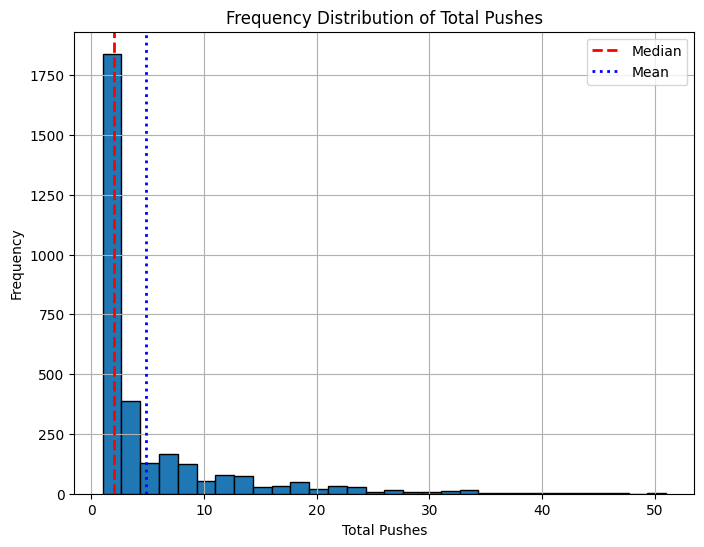

In [ ]:
import matplotlib.pyplot as plt

import numpy as np 

median_pushes = np.median(np.array(learned_total_pushes))
mean_pushes = np.mean(np.array(learned_total_pushes))

print("Median total pushes:", median_pushes)
print("Mean total pushes:", mean_pushes)

plt.figure(figsize=(8, 6))
plt.hist(learned_total_pushes, bins=30, edgecolor='black')
plt.axvline(median_pushes, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_pushes, color='blue', linestyle='dotted', linewidth=2, label='Mean')
plt.xlabel('Total Pushes')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Total Pushes')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
no_heuristic_results_train = {
    'easy': [],
    'medium': [],
    'hard': []
}
# results_test = {
#     'easy': [],
#     'medium': [],
#     'hard': []
# }

total = 0
success = 0

for env in search_per_env_per_neighbor.keys():
    for region in search_per_env_per_neighbor[env].keys():
        if search_per_env_per_neighbor[env][region]['success'] == 1:
            total += 1
        if region in no_heuristic_per_env_per_neighbor[env]:
            if no_heuristic_per_env_per_neighbor[env][region]['success'] == 1:
                success += 1
                if search_per_env_per_neighbor[env][region]['ratio'] > easy_threshold:
                    no_heuristic_results_train['easy'].append(no_heuristic_per_env_per_neighbor[env][region]['pushes'])
                elif search_per_env_per_neighbor[env][region]['ratio'] > hard_threshold and search_per_env_per_neighbor[env][region]['ratio'] <= easy_threshold:
                    no_heuristic_results_train['medium'].append(no_heuristic_per_env_per_neighbor[env][region]['pushes'])
                else:
                    no_heuristic_results_train['hard'].append(no_heuristic_per_env_per_neighbor[env][region]['pushes'])

import numpy as np
for category in ['easy', 'medium', 'hard']:
    pushes = no_heuristic_results_train[category]
    if pushes:
        median_val = np.median(np.array(pushes))
        mean_val = np.mean(np.array(pushes))
        print(f"Median no_heuristic pushes for {category}: {median_val}")
        print(f"Mean no_heuristic pushes for {category}: {mean_val}")
    else:
        print(f"No pushes for {category}")

Median no_heuristic pushes for easy: 1.0
Mean no_heuristic pushes for easy: 1.1670702179176755
Median no_heuristic pushes for medium: 1.0
Mean no_heuristic pushes for medium: 4.849034292471423
Median no_heuristic pushes for hard: 16.0
Mean no_heuristic pushes for hard: 25.65051967334818


In [ ]:
learned_results_train = {
    'easy': [],
    'medium': [],
    'hard': []
}
# results_test = {
#     'easy': [],
#     'medium': [],
#     'hard': []
# }

total = 0
success = 0

for env in search_per_env_per_neighbor.keys():
    for region in search_per_env_per_neighbor[env].keys():
        if search_per_env_per_neighbor[env][region]['success'] == 1:
            total += 1
        if env in learned_per_env_per_neighbor:
            if region in learned_per_env_per_neighbor[env]:
                if learned_per_env_per_neighbor[env][region]['success'] == 1:
                    success += 1
                    if learned_per_env_per_neighbor[env][region]['ratio'] > easy_threshold:
                        learned_results_train['easy'].append(learned_per_env_per_neighbor[env][region]['pushes'])
                    elif learned_per_env_per_neighbor[env][region]['ratio'] > hard_threshold and learned_per_env_per_neighbor[env][region]['ratio'] <= easy_threshold:
                        learned_results_train['medium'].append(learned_per_env_per_neighbor[env][region]['pushes'])
                    else:
                        learned_results_train['hard'].append(learned_per_env_per_neighbor[env][region]['pushes'])
        
import numpy as np
for category in ['easy', 'medium', 'hard']:
    pushes = learned_results_train[category]
    if pushes:
        median_val = np.median(np.array(pushes))
        mean_val = np.mean(np.array(pushes))
        print(f"Median learned pushes for {category}: {median_val}")
        print(f"Mean learned pushes for {category}: {mean_val}")
    else:
        print(f"No pushes for {category}")

Median learned pushes for easy: 1.0
Mean learned pushes for easy: 1.0
Median learned pushes for medium: 2.0
Mean learned pushes for medium: 2.0754716981132075
No pushes for hard


In [83]:
success / total

0.9924019051939216

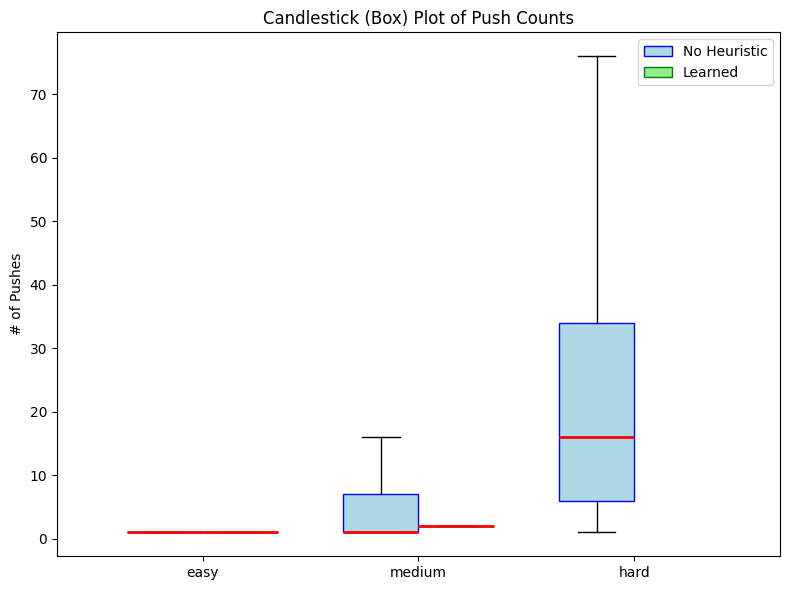

In [84]:
import matplotlib.pyplot as plt

# Collect data for plotting
categories = ['easy', 'medium', 'hard']
no_heuristic_data = [no_heuristic_results_train[cat] for cat in categories]
learned_data = [learned_results_train[cat] for cat in categories]

fig, ax = plt.subplots(figsize=(8,6))
boxprops = dict(linewidth=2, color='blue')
medianprops = dict(linewidth=2, color='red')

# Plot candlestick/box plot for both sets; position side by side for each category
width = 0.35
positions1 = [i - width/2 for i in range(1, 4)]
positions2 = [i + width/2 for i in range(1, 4)]

bp1 = ax.boxplot(
    no_heuristic_data, 
    positions=positions1, 
    widths=width, 
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=medianprops,
    showfliers=False
)
bp2 = ax.boxplot(
    learned_data, 
    positions=positions2, 
    widths=width, 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgreen', color='green'),
    medianprops=medianprops,
    showfliers=False
)

ax.set_xticks([1,2,3])
ax.set_xticklabels(categories)
ax.set_ylabel("# of Pushes")
ax.set_title("Candlestick (Box) Plot of Push Counts")
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ["No Heuristic", "Learned"], loc="upper right")

plt.tight_layout()
plt.show()


In [70]:
success / total 

0.9924019051939216

In [71]:
# Pick one of the files with this issue
file = "/common/users/dm1487/namo_data/outputs/diffusion_only_goal/nov20_1push_diffusion_only_goal/2025-11-20_09-41-46/results_new/1/modular_data_arrakis/arrakis_env_000186_results.pkl"

with open(file, "rb") as f:
    data = pickle.load(f)
    ep = data['episode_results'][2]  # Episode 2 from the output

    print("solution_found:", ep['solution_found'])
    print("pushes_total_for_neighbour:", ep['algorithm_stats']['pushes_total_for_neighbour'])
    print("action_sequence:", ep['action_sequence'])
    print("solutions_total_for_neighbour:", ep['algorithm_stats']['solutions_total_for_neighbour'])
    print("neighbour_region_label:", ep['algorithm_stats']['neighbour_region_label'])

solution_found: True
pushes_total_for_neighbour: 0
action_sequence: []
solutions_total_for_neighbour: 0
neighbour_region_label: region_4


In [151]:
print("Data collection timestamp:", data.get('timestamp', 'N/A'))
print("Config used:", data.get('config', {}).get('algorithm', 'N/A'))

Data collection timestamp: N/A
Config used: N/A
